In [110]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

### Importing the data as dataframe

In [111]:
topics =["abortion", "cloning", "death penalty", "gun control", "marijuana legalization", "minimum wage", "nuclear energy", "school uniforms"]
seeds = ["Seed1", "Seed2", "Seed3", "Seed4", "Seed5", "Seed6", "Seed7", "Seed8", "Seed9", "Seed10"]

In [112]:
def import_as_dataframe(seed, topic):
    input_file = f'/Users/myrthereuver/PycharmProjects/Claim_reproduction/acl2019-BERT-argument-classification-and-clustering-master/argument-classification/bert_output/bert_output/31May/ukp/{seed}/bert-base-topic-sentence/{topic}_test_topic/test_predictions.txt'
    df_current = pd.read_csv(input_file, delimiter = "\t", names=["True", "Pred", "Topic", "Claim"])
    return df_current

#### Seeds

In [113]:
seed_1_list = [import_as_dataframe('Seed1', t) for t in topics]
seed_2_list = [import_as_dataframe('Seed2', t) for t in topics]
seed_3_list = [import_as_dataframe('Seed3', t) for t in topics]
seed_4_list = [import_as_dataframe('Seed4', t) for t in topics]
seed_5_list = [import_as_dataframe('Seed5', t) for t in topics]
seed_6_list = [import_as_dataframe('Seed6', t) for t in topics]
seed_7_list = [import_as_dataframe('Seed7', t) for t in topics]
seed_8_list = [import_as_dataframe('Seed8', t) for t in topics]
seed_9_list = [import_as_dataframe('Seed9', t) for t in topics]
seed_10_list = [import_as_dataframe('Seed10', t) for t in topics]

#### Topics

In [114]:
abortion_list = [import_as_dataframe(s, 'abortion') for s in seeds]
cloning_list = [import_as_dataframe(s, 'cloning') for s in seeds]
deathpen_list  = [import_as_dataframe(s, 'death penalty') for s in seeds]
guncontrol_list  = [import_as_dataframe(s, 'gun control') for s in seeds]
marijuana_list  = [import_as_dataframe(s, 'marijuana legalization') for s in seeds]
minwage_list  = [import_as_dataframe(s, 'minimum wage') for s in seeds]
nuclear_list  = [import_as_dataframe(s, 'nuclear energy') for s in seeds]
schooluni_list  = [import_as_dataframe(s, 'school uniforms') for s in seeds]

#### Testing

In [115]:
df_guncontrol_s2 = import_as_dataframe('Seed2', 'gun control')
df_guncontrol_s3 = import_as_dataframe('Seed3', 'gun control')

In [116]:
df_guncontrol_s2[4:10]

,True,Pred,Topic,Claim
4,Argument_against,Argument_against,gun control,Lithuania has one of the world 's lowest gun o...
5,NoArgument,NoArgument,gun control,You misread what I said it that section .
6,NoArgument,Argument_against,gun control,Japan has a low gun ownership rate at 0.6 guns...
7,Argument_for,Argument_against,gun control,When high-capacity magazines were used in mass...
8,NoArgument,NoArgument,gun control,"Ultimately , those who promote this argument a..."
9,NoArgument,Argument_against,gun control,Violent video games are a fact of life across ...


In [117]:
df_guncontrol_s3[4:10]

,True,Pred,Topic,Claim
4,Argument_against,NoArgument,gun control,Lithuania has one of the world 's lowest gun o...
5,NoArgument,NoArgument,gun control,You misread what I said it that section .
6,NoArgument,Argument_against,gun control,Japan has a low gun ownership rate at 0.6 guns...
7,Argument_for,Argument_against,gun control,When high-capacity magazines were used in mass...
8,NoArgument,NoArgument,gun control,"Ultimately , those who promote this argument a..."
9,NoArgument,NoArgument,gun control,Violent video games are a fact of life across ...


In [118]:
print(len(abortion_list))

10


### Combining into one dataframe

#### Seeds

In [119]:
df_all_seed1 = pd.concat(seed_1_list)
df_all_seed2 = pd.concat(seed_2_list)
df_all_seed3 = pd.concat(seed_3_list)
df_all_seed4 = pd.concat(seed_4_list)
df_all_seed5 = pd.concat(seed_5_list)
df_all_seed6 = pd.concat(seed_6_list)
df_all_seed7 = pd.concat(seed_7_list)
df_all_seed8 = pd.concat(seed_8_list)
df_all_seed9 = pd.concat(seed_9_list)
df_all_seed10 = pd.concat(seed_10_list)

df_all_list = [df_all_seed1, df_all_seed2, df_all_seed3, df_all_seed4, df_all_seed5, df_all_seed6, df_all_seed7, df_all_seed8, df_all_seed9, df_all_seed10]

In [120]:
df_all_list[0]

,True,Pred,Topic,Claim
0,NoArgument,NoArgument,abortion,With that I would like to give everyone someth...
1,NoArgument,NoArgument,abortion,"Do not judge , or you may be judged yourself ."
2,NoArgument,NoArgument,abortion,"Results have varied from poll to poll , countr..."
3,NoArgument,NoArgument,abortion,"Additionally , about 15 % of Americans agree t..."
4,NoArgument,NoArgument,abortion,"My personal beliefs aside , the bible tells us..."
...,...,...,...,...
594,NoArgument,NoArgument,school uniforms,Anonymous says2013-07-11T09 :19:41.743 Report ...
595,Argument_for,Argument_for,school uniforms,A 1994 peer-reviewed study found that students...
596,Argument_against,Argument_for,school uniforms,If your school directors are thinking of doing...
597,NoArgument,NoArgument,school uniforms,It ’s very trashy especially when their wearin...


### Get some information on content

In [121]:
df_all_list[0].describe()

,True,Pred,Topic,Claim
count,4998,4998,4998,4998
unique,3,3,8,4955
top,NoArgument,NoArgument,death penalty,ProCon.org is a 501 ( c ) ( 3 ) public charity...
freq,2788,2741,722,3


In [122]:
abortion_list[0].describe()

,True,Pred,Topic,Claim
count,711,711,711,711
unique,3,3,1,711
top,NoArgument,NoArgument,abortion,Please update this article to reflect recent e...
freq,436,458,711,1


In [123]:
df_all_seed1["Topic"].value_counts()

death penalty             722
nuclear energy            717
abortion                  711
gun control               669
cloning                   609
school uniforms           599
minimum wage              494
marijuana legalization    477
Name: Topic, dtype: int64

In [124]:
df_all_seed1.groupby('Topic')['True'].value_counts()

Topic                   True            
abortion                NoArgument          436
                        Argument_against    148
                        Argument_for        127
cloning                 NoArgument          299
                        Argument_against    168
                        Argument_for        142
death penalty           NoArgument          391
                        Argument_against    228
                        Argument_for        103
gun control             NoArgument          378
                        Argument_for        158
                        Argument_against    133
marijuana legalization  NoArgument          244
                        Argument_against    121
                        Argument_for        112
minimum wage            NoArgument          269
                        Argument_for        115
                        Argument_against    110
nuclear energy          NoArgument          424
                        Argument_against    171

### Plotting confusion matrix

In [125]:
def add_numeric(df):
    df['True_num'] = df['True'].replace("NoArgument", 0).replace("Argument_for", 1).replace("Argument_against", 2)
    df['Pred_num'] = df['Pred'].replace("NoArgument", 0).replace("Argument_for", 1).replace("Argument_against", 2)
    return df

def df_confusion_matrix(df, seed, topic, norm=False):
    from sklearn.metrics import confusion_matrix
    
    labels = ["NoArgument", "Argument_for", "Argument_against"]
    df = add_numeric(df)
    
    if norm != False:
        cm = np.round(confusion_matrix(df['True_num'], df['Pred_num'], normalize=norm), 2)
    if norm == False:
        cm = confusion_matrix(df['True_num'], df['Pred_num']) 

    sn.set(font_scale=1.4)
    ax = sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', xticklabels = labels, yticklabels = labels)
    ax.set(title=f'Confusion matrix {topic} {seed}'.format(topic, seed),
    xlabel="Predicted",
    ylabel="True")
    plt.tight_layout()
    return cm
    

#### Seeds (different topics)

In [126]:
def topics_df_confusion_matrix(df_list, seed, topics):
    from sklearn.metrics import confusion_matrix
        
    fig, axs = plt.subplots(2, 4, figsize=(15,5))
    
    labels = ["NoArgument", "Argument_for", "Argument_against"]
    cm_list = []
    
    df_list = [add_numeric(df_list[i]) for i in range(0, len(df_list))]
    cm_list = [confusion_matrix(df['True_num'], df['Pred_num']) for df in df_list]
    
    cm_num = 0
    for n in [0, 1]:
        for i in range(0, 4):
            sn.set(font_scale=0.8)
            ax = sn.heatmap(cm_list[cm_num], annot=True, annot_kws={"size": 16}, fmt='g', xticklabels = labels, yticklabels = labels, ax=axs[n, i])
            topic = topics[cm_num]
            ax.set(title=f'{topic} {seed}'.format(topic, seed),
            xlabel="Predicted",
            ylabel="True")    
            cm_num = cm_num+1
    plt.tight_layout()
    return cm_list
    

#### Seed 1

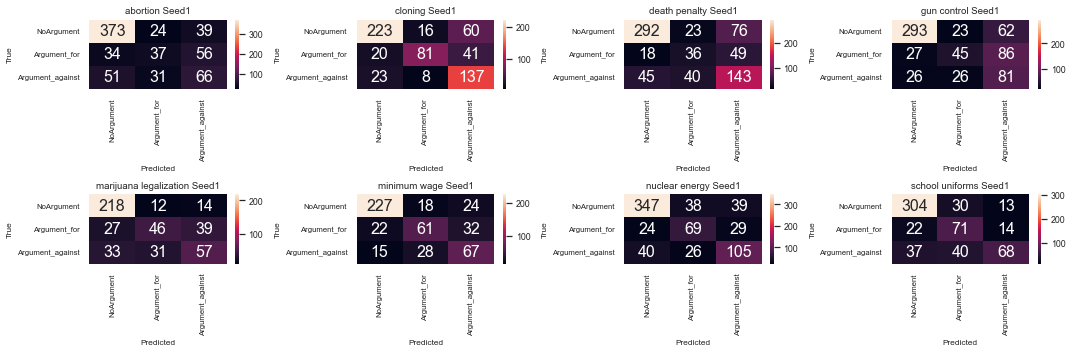

In [127]:
num_df_all_s1 = topics_df_confusion_matrix(seed_1_list, 'Seed1', topics)

#### Seed 2

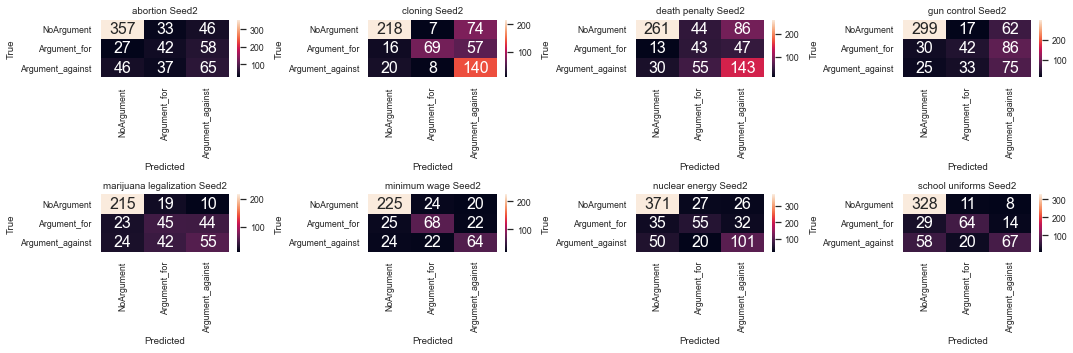

In [128]:
num_df_all_s2 = topics_df_confusion_matrix(seed_2_list, 'Seed2', topics)

#### Seed 3

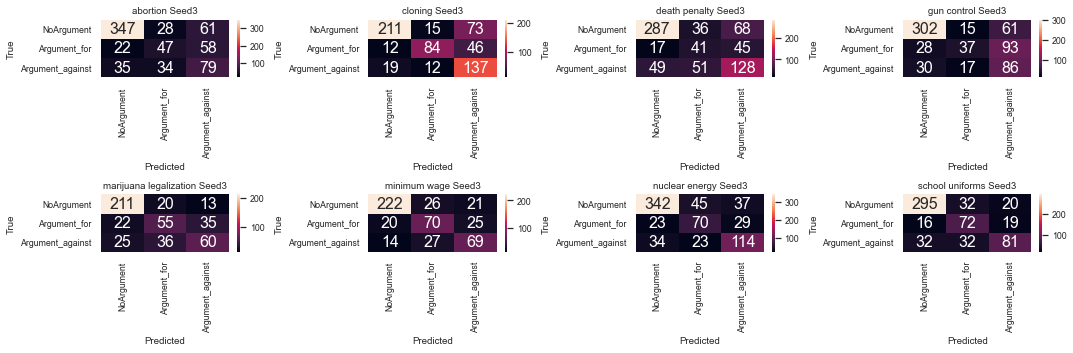

In [129]:
num_df_all_s3 = topics_df_confusion_matrix(seed_3_list, 'Seed3', topics)

#### Seed 4

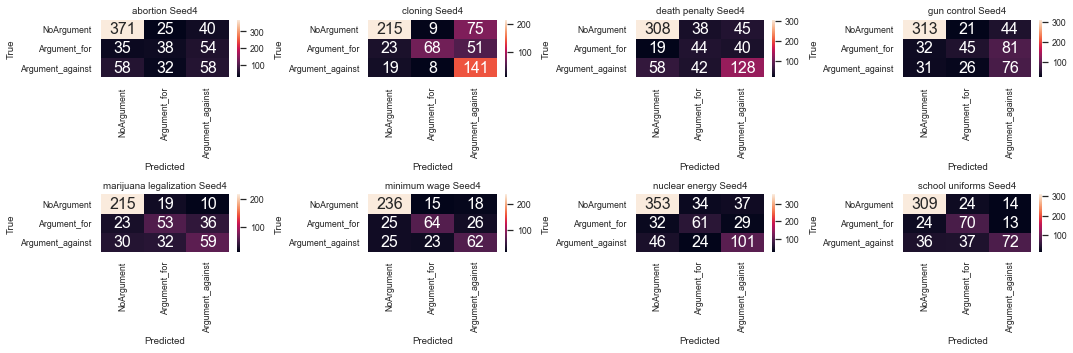

In [130]:
num_df_all_s4 = topics_df_confusion_matrix(seed_4_list, 'Seed4', topics)

#### Seed 5

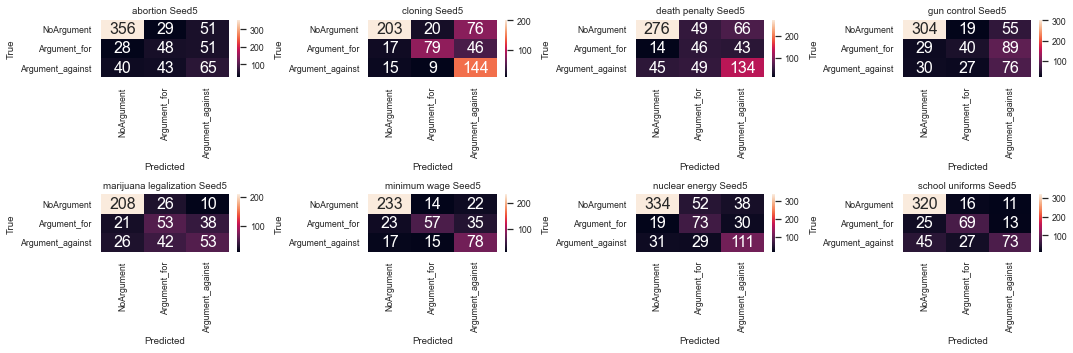

In [131]:
num_df_all_s5 = topics_df_confusion_matrix(seed_5_list, 'Seed5', topics)

#### Seed 6

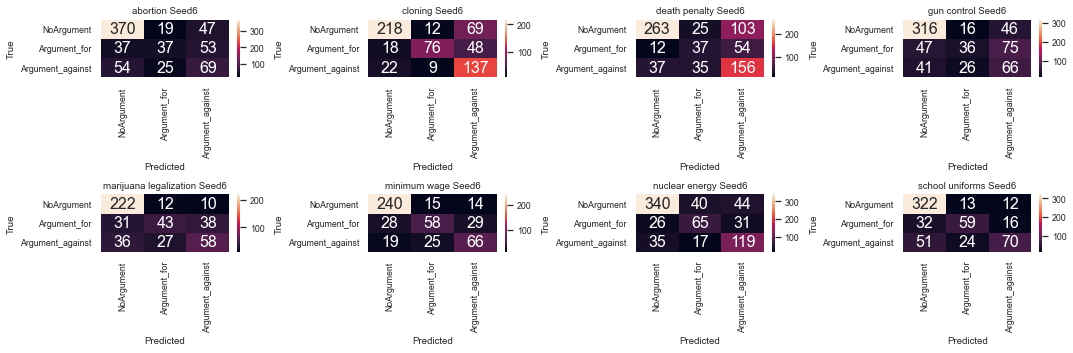

In [132]:
num_df_all_s6 = topics_df_confusion_matrix(seed_6_list, 'Seed6', topics)

#### Seed 7

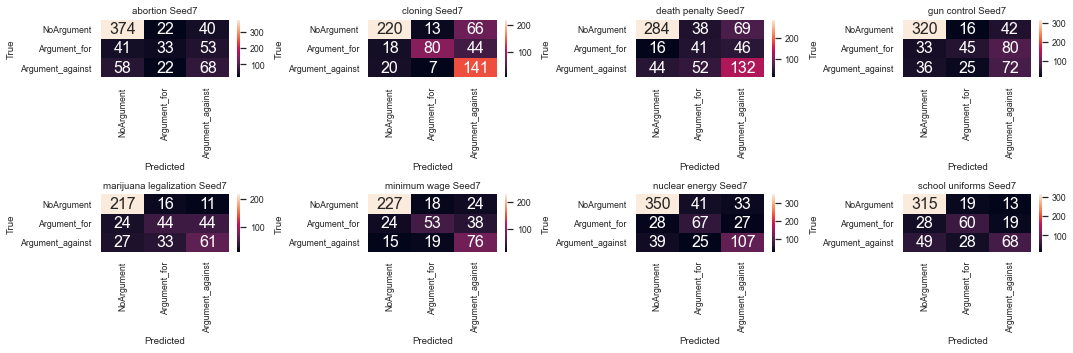

In [133]:
num_df_all_s7 = topics_df_confusion_matrix(seed_7_list, 'Seed7', topics)

#### Seed 8

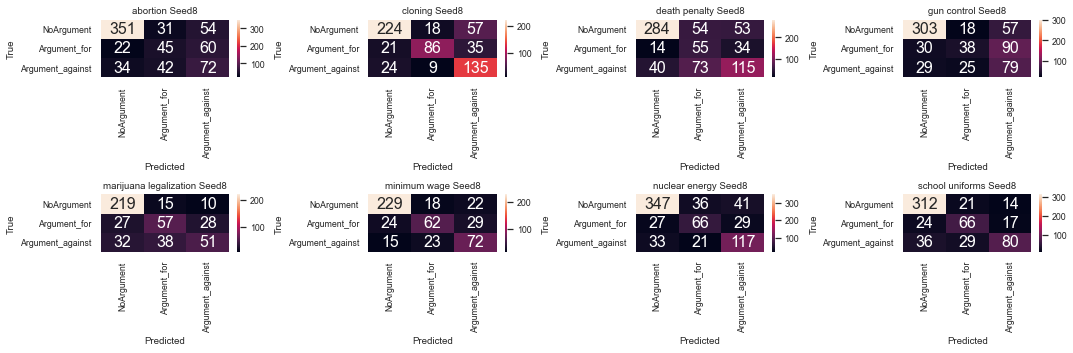

In [134]:
num_df_all_s8 = topics_df_confusion_matrix(seed_8_list, 'Seed8', topics)

#### Seed 9

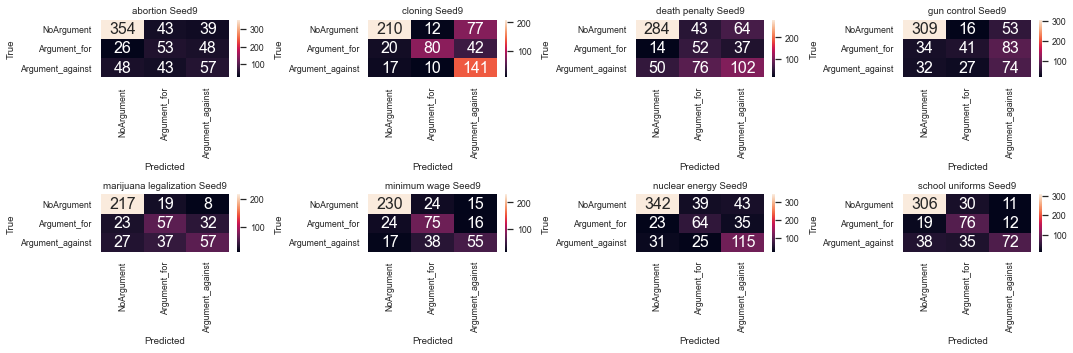

In [135]:
num_df_all_s9 = topics_df_confusion_matrix(seed_9_list, 'Seed9', topics)

#### Seed 10

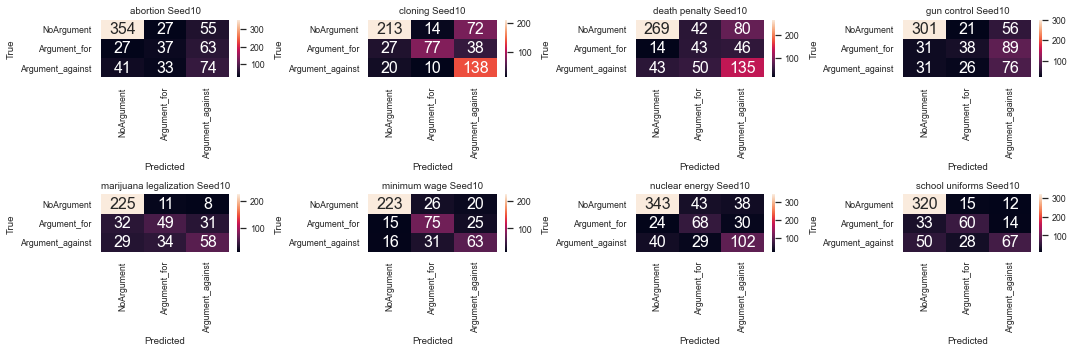

In [136]:
num_df_all_s10 = topics_df_confusion_matrix(seed_10_list, 'Seed10', topics)

### Topics (over seeds)

In [137]:
def seeds_df_confusion_matrix(df_list, seeds, topic, stdev=False, mean=False, norm=False):
    from sklearn.metrics import confusion_matrix
        
    labels = ["NoArgument", "Argument_for", "Argument_against"]
    cm_list = []
    
    df_list = [add_numeric(df_list[i]) for i in range(0, len(df_list))]
    if norm != False:
        cm_list = [np.round(confusion_matrix(df['True_num'], df['Pred_num'], normalize=norm), 2) for df in df_list]
    if norm == False:
        cm_list = [confusion_matrix(df['True_num'], df['Pred_num'],) for df in df_list]
    Mean = np.dstack(cm_list).mean(axis=2)
    Stdev = np.dstack(cm_list).std(axis=2)
    Stdev = np.round(Stdev, 3)
        
    if mean == True:
        sn.set(font_scale=1.5)
        ax = sn.heatmap(Mean, annot=True, annot_kws={"size": 14}, fmt='g', xticklabels = labels, yticklabels = labels)
        ax.set(title=f'mean {topic} {seeds}'.format(topic, seeds),
        xlabel="Predicted",
        ylabel="True")    
    if stdev == True:
        sn.set(font_scale=1.5)
        ax = sn.heatmap(Stdev, annot=True, annot_kws={"size": 14}, fmt='g', xticklabels = labels, yticklabels = labels)
        ax.set(title=f'stdev {topic} {seeds}',
        xlabel="Predicted",
        ylabel="True")    
    if mean == False and stdev == False:
        fig, axs = plt.subplots(2, 5, figsize=(15,5))
        cm_num = 0
        for n in [0, 1]:
            for i in range(0, 5):
                sn.set(font_scale=0.7)
                ax = sn.heatmap(cm_list[cm_num], annot=True, annot_kws={"size": 14}, fmt='g', xticklabels = labels, yticklabels = labels, ax=axs[n, i])
                seed = seeds[cm_num]
                ax.set(title=f'{topic} {seed}'.format(topic, seed),
                xlabel="Predicted",
                ylabel="True")    
                cm_num = cm_num+1
    plt.tight_layout()
    plt.savefig(f'{topic}_{seeds}_figure.png')
    return cm_list

### Over all (no topic distinction)

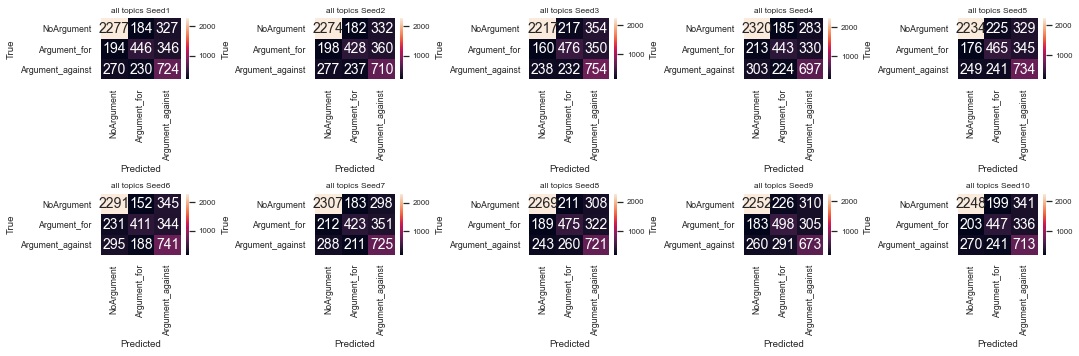

In [138]:
num_df_all = seeds_df_confusion_matrix(df_all_list, seeds, 'all topics')

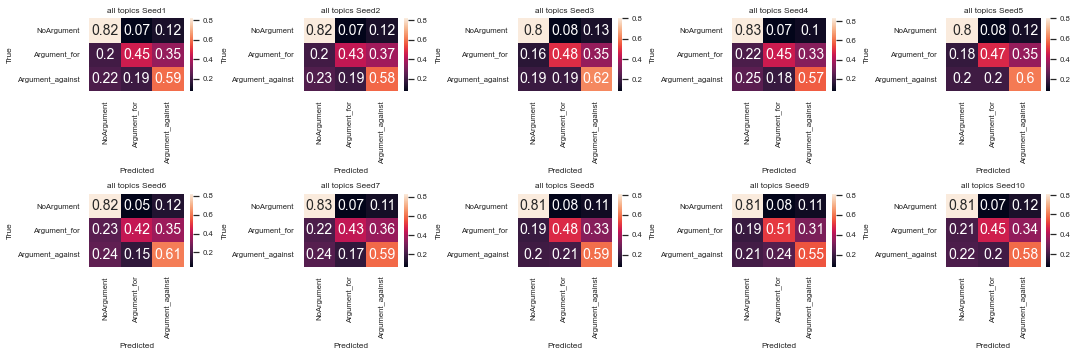

In [139]:
num_df_all_rel = seeds_df_confusion_matrix(df_all_list, seeds, 'all topics', norm='true')

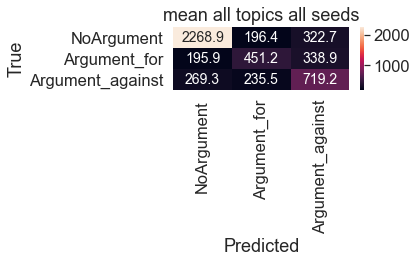

In [140]:
mean_df_all = seeds_df_confusion_matrix(df_all_list, "all seeds", 'all topics', mean=True)

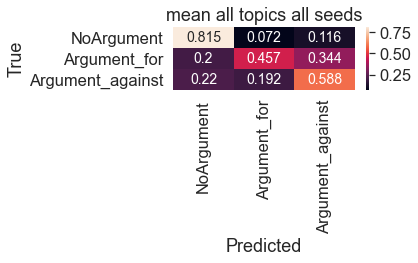

In [141]:
mean_df_all = seeds_df_confusion_matrix(df_all_list, "all seeds", 'all topics', mean=True, norm='true')

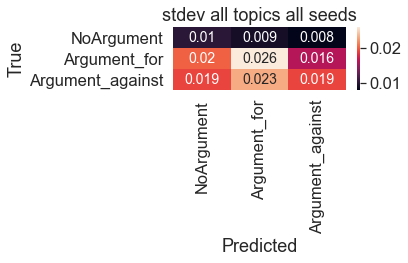

In [142]:
mean_df_all = seeds_df_confusion_matrix(df_all_list, "all seeds", 'all topics', stdev=True, norm='true')

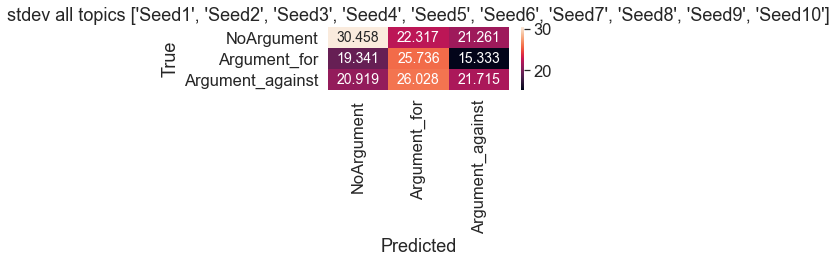

In [143]:
stdev_df_all = seeds_df_confusion_matrix(df_all_list, seeds, 'all topics', stdev=True)

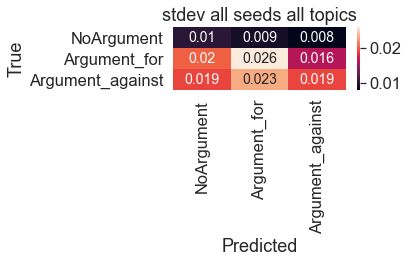

In [144]:
stdev_df_all = seeds_df_confusion_matrix(df_all_list, 'all topics', 'all seeds', stdev=True, norm='true')

#### Topic: abortion

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


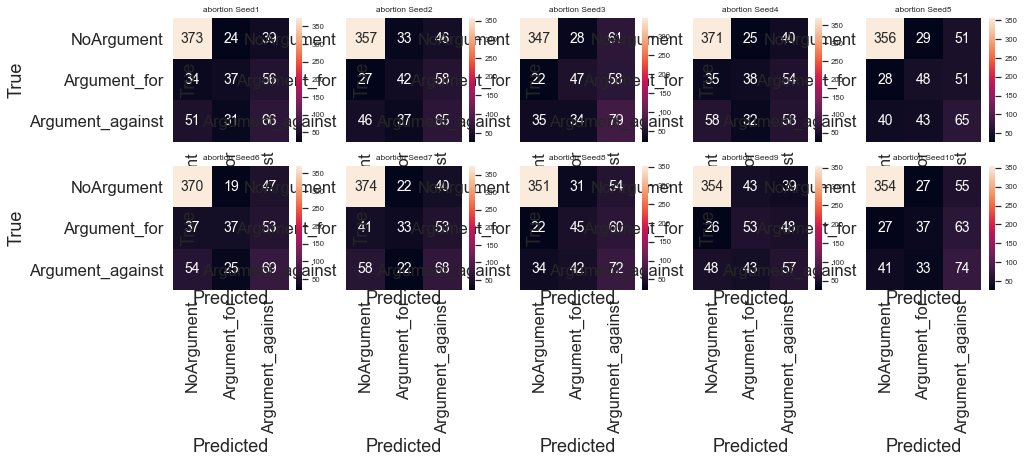

In [145]:
num_df_all_abortion = seeds_df_confusion_matrix(abortion_list, seeds, 'abortion')

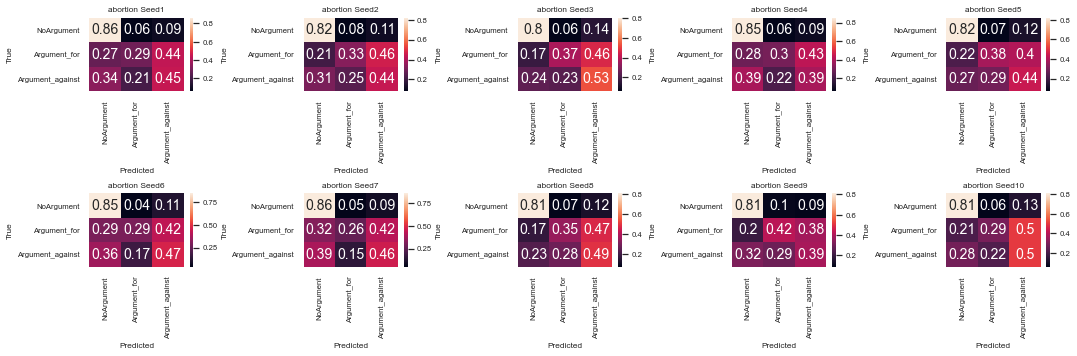

In [146]:
num_df_all_abortion_rel = seeds_df_confusion_matrix(abortion_list, seeds, 'abortion', norm='true')

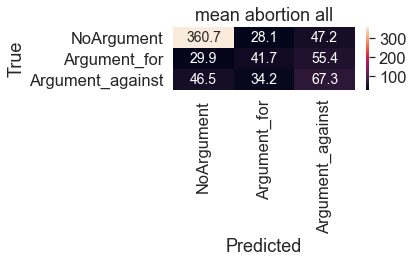

In [147]:
num_df_all_abortion = seeds_df_confusion_matrix(abortion_list, "all", 'abortion', mean=True)

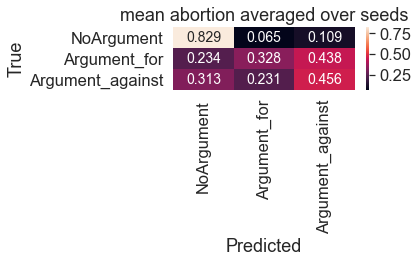

In [148]:
num_df_all_abortion = seeds_df_confusion_matrix(abortion_list, "averaged over seeds", 'abortion', mean=True, norm='true')

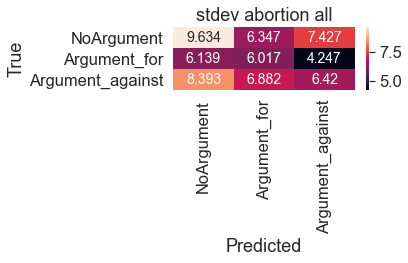

In [149]:
num_df_all_abortion = seeds_df_confusion_matrix(abortion_list, "all", 'abortion', stdev=True)

#### Topic: cloning

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


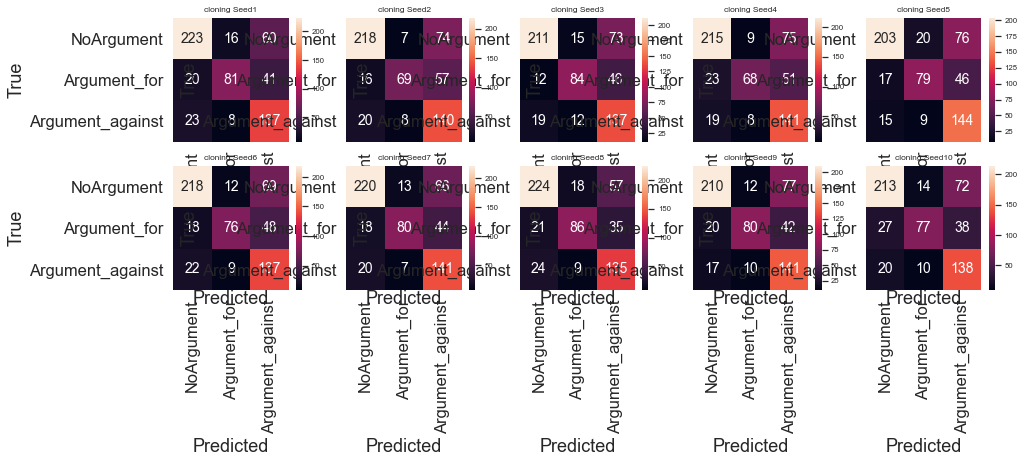

In [150]:
num_df_all_cloning = seeds_df_confusion_matrix(cloning_list, seeds, 'cloning')

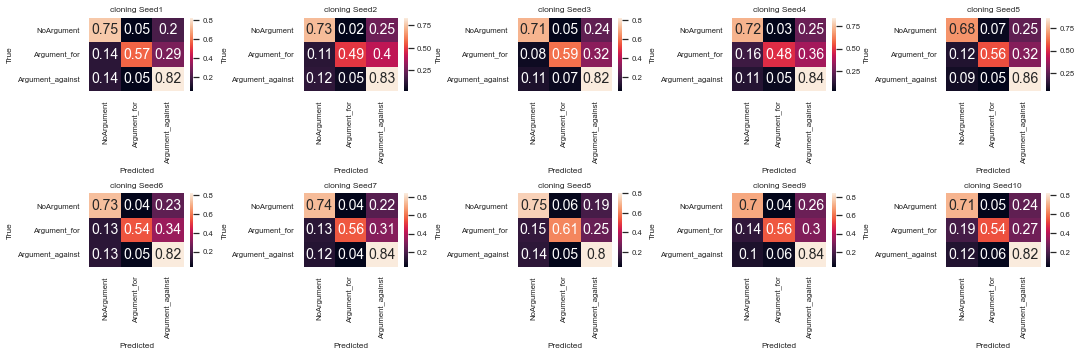

In [151]:
num_df_all_cloning_rel = seeds_df_confusion_matrix(cloning_list, seeds, 'cloning', norm='true')

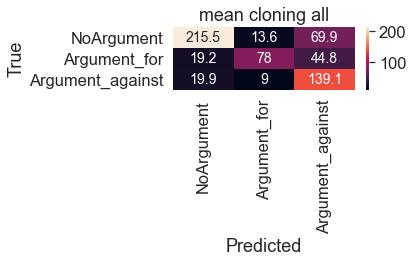

In [152]:
num_df_all_cloning = seeds_df_confusion_matrix(cloning_list, "all", 'cloning', mean=True)

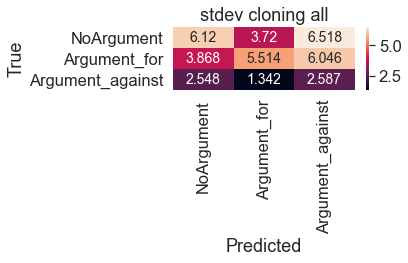

In [153]:
num_df_all_cloning = seeds_df_confusion_matrix(cloning_list, "all", 'cloning', stdev=True)

#### Topic: death penalty

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


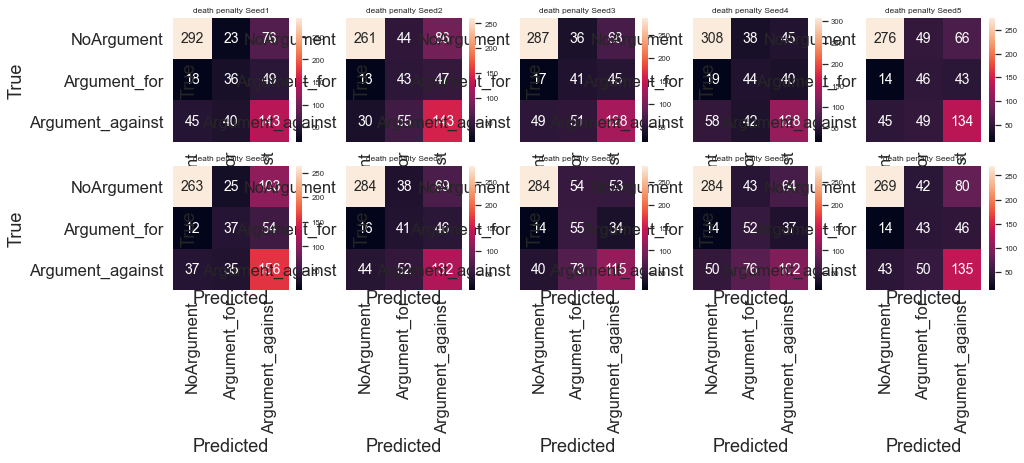

In [154]:
num_df_all_deathpen = seeds_df_confusion_matrix(deathpen_list, seeds, 'death penalty')

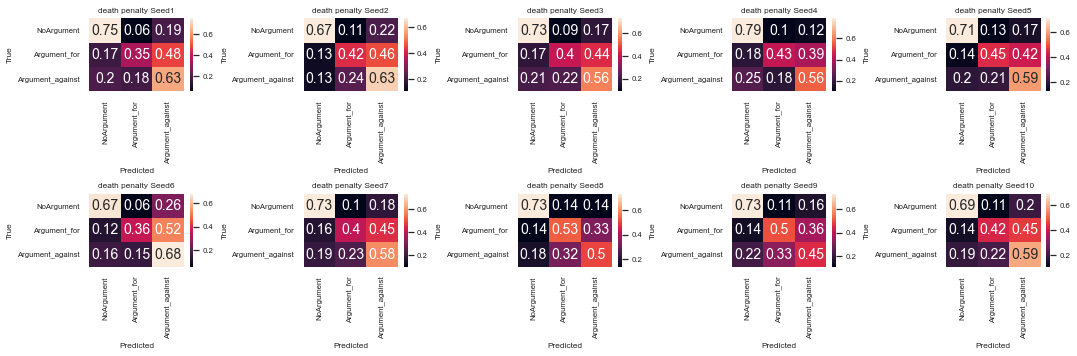

In [155]:
num_df_all_deathpen_rel = seeds_df_confusion_matrix(deathpen_list, seeds, 'death penalty', norm='true')

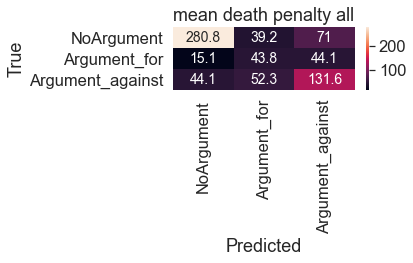

In [156]:
num_df_all_deathpen = seeds_df_confusion_matrix(deathpen_list, "all", 'death penalty', mean=True)

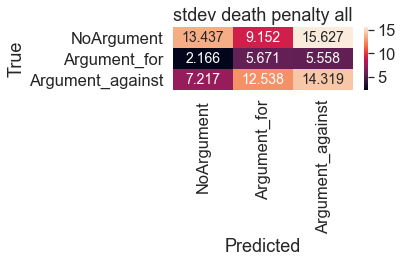

In [157]:
num_df_all_deathpen = seeds_df_confusion_matrix(deathpen_list, "all", 'death penalty', stdev=True)

#### Topic: gun control

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


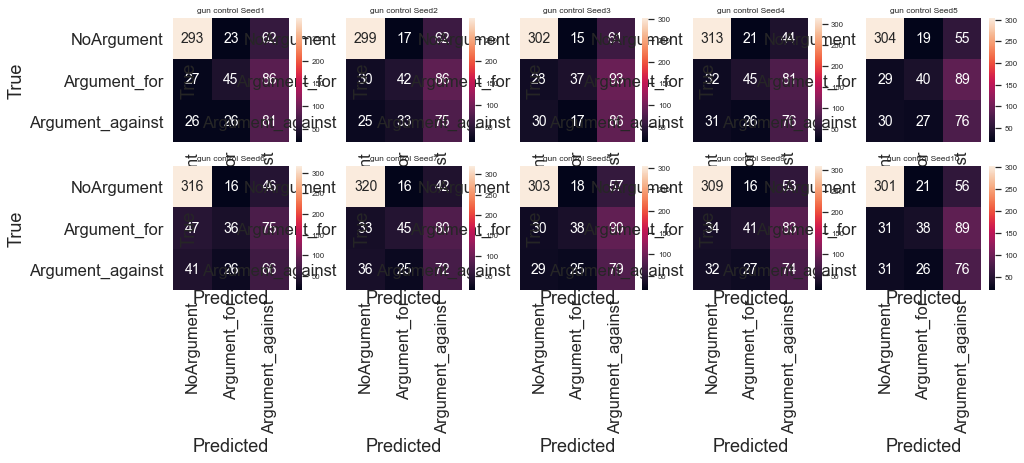

In [158]:
num_df_all_guncontrol = seeds_df_confusion_matrix(guncontrol_list, seeds, 'gun control')

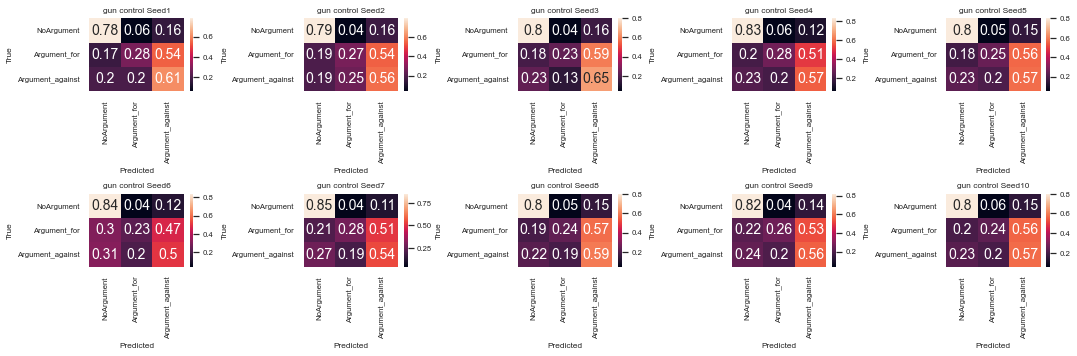

In [159]:
num_df_all_guncontrol_rel = seeds_df_confusion_matrix(guncontrol_list, seeds, 'gun control', norm='true')

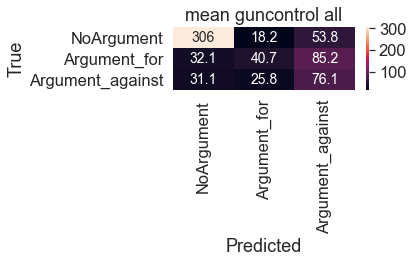

In [160]:
num_df_all_guncontrol = seeds_df_confusion_matrix(guncontrol_list, "all", 'guncontrol', mean=True)

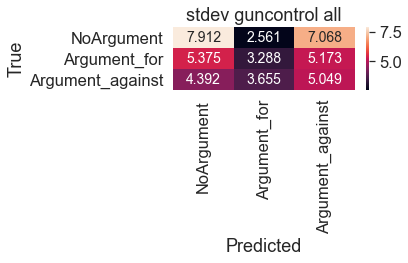

In [161]:
num_df_all_guncontrol = seeds_df_confusion_matrix(guncontrol_list, "all", 'guncontrol', stdev=True)

#### Topic: marijuana

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


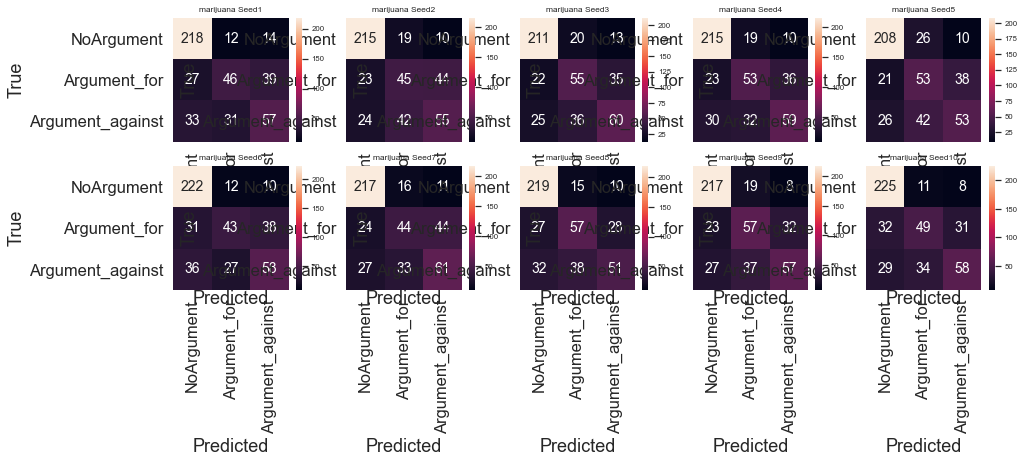

In [162]:
num_df_all_marijuana = seeds_df_confusion_matrix(marijuana_list, seeds, 'marijuana')

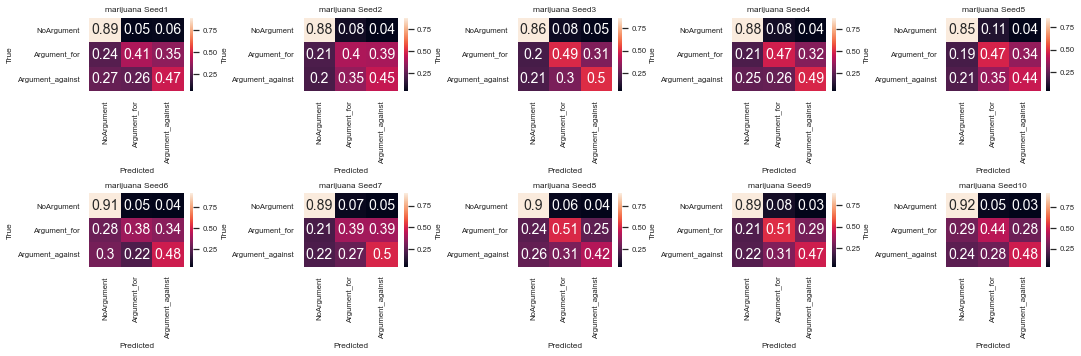

In [163]:
num_df_all_marijuana_rel = seeds_df_confusion_matrix(marijuana_list, seeds, 'marijuana', norm='true')

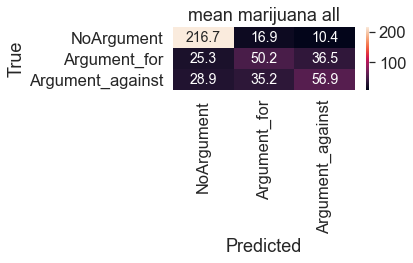

In [164]:
num_df_all_marijuana = seeds_df_confusion_matrix(marijuana_list, "all", 'marijuana', mean=True)

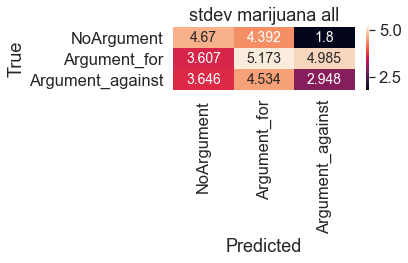

In [165]:
num_df_all_marijuana = seeds_df_confusion_matrix(marijuana_list, "all", 'marijuana', stdev=True)

#### Topic: minimum wage

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


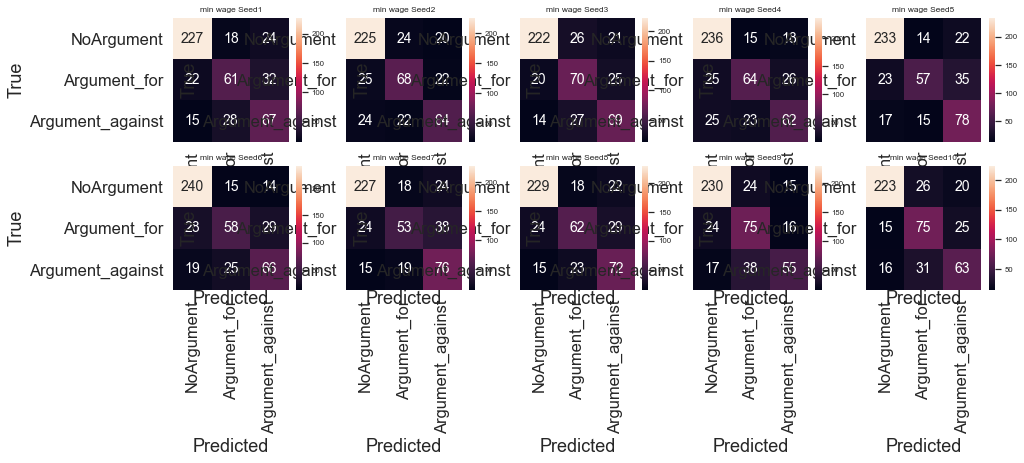

In [166]:
num_df_all_minwage = seeds_df_confusion_matrix(minwage_list, seeds, 'min wage')

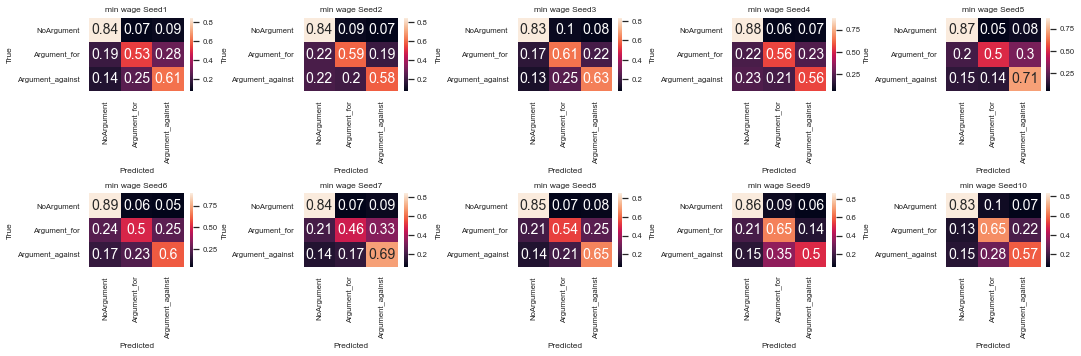

In [167]:
num_df_all_minwage_rel = seeds_df_confusion_matrix(minwage_list, seeds, 'min wage', norm='true')

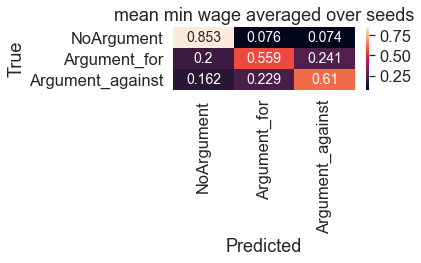

In [168]:
num_df_all_minwage = seeds_df_confusion_matrix(minwage_list, "averaged over seeds", 'min wage', mean=True, norm='true')

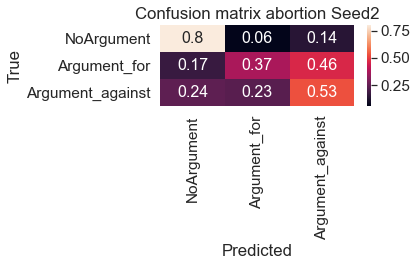

In [169]:
num_df_all_minwage = df_confusion_matrix(abortion_list[2], 'Seed2', 'abortion', norm='true')

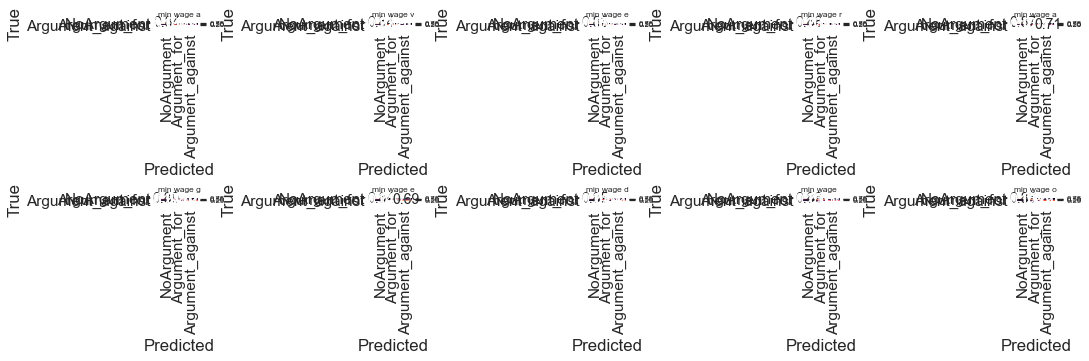

In [170]:
num_df_all_minwage = seeds_df_confusion_matrix(minwage_list, "averaged over seeds", 'min wage', norm='true')

#### Topic: nuclear

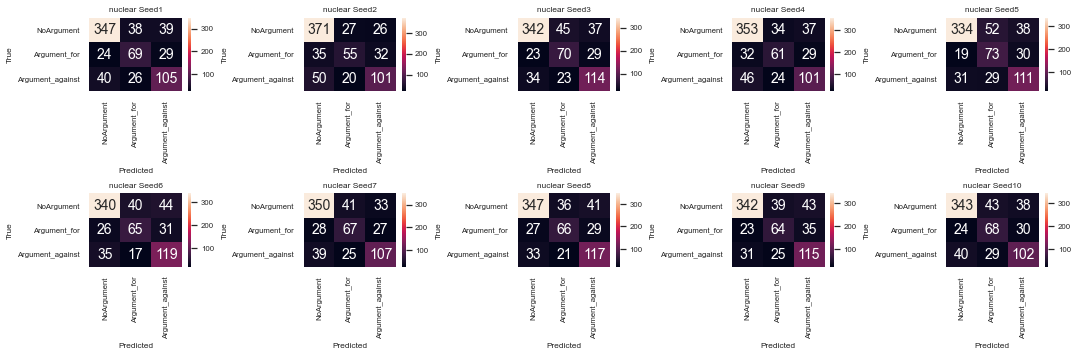

In [171]:
num_df_all_nuclear = seeds_df_confusion_matrix(nuclear_list, seeds, 'nuclear')

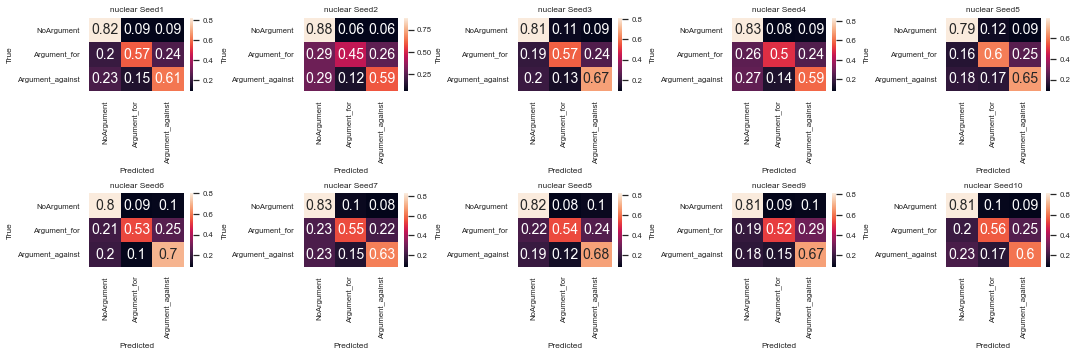

In [172]:
num_df_all_nuclear_rel = seeds_df_confusion_matrix(nuclear_list, seeds, 'nuclear', norm='true')

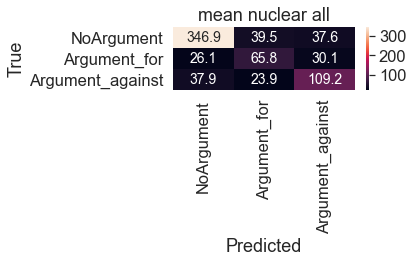

In [173]:
num_df_all_nuclear = seeds_df_confusion_matrix(nuclear_list, "all", 'nuclear', mean=True)

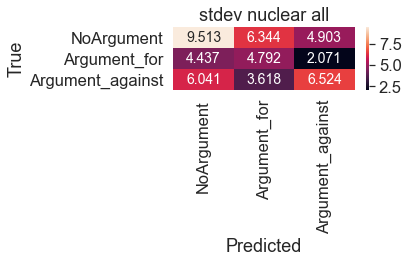

In [174]:
num_df_all_nuclear = seeds_df_confusion_matrix(nuclear_list, "all", 'nuclear', stdev=True)

#### Topic: school uniform

<ipython-input-137-8464922a335a>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


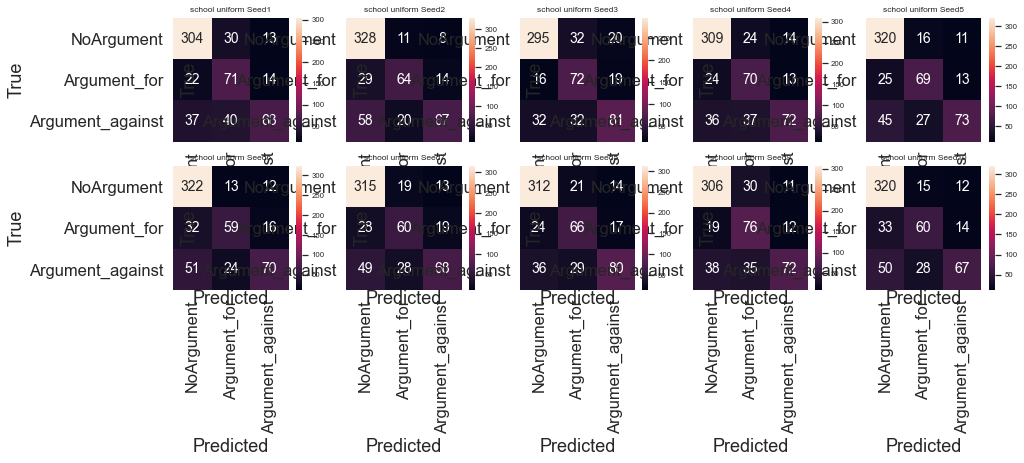

In [175]:
num_df_all_schooluni = seeds_df_confusion_matrix(schooluni_list, seeds, 'school uniform')

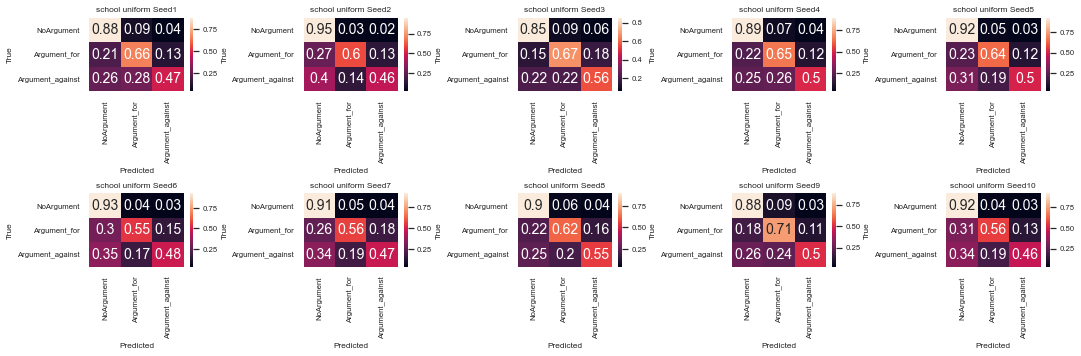

In [176]:
num_df_all_schooluni_rel = seeds_df_confusion_matrix(schooluni_list, seeds, 'school uniform', norm='true')
                            

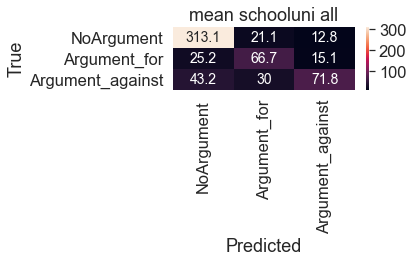

In [177]:
num_df_all_schooluni = seeds_df_confusion_matrix(schooluni_list, "all", 'schooluni', mean=True)

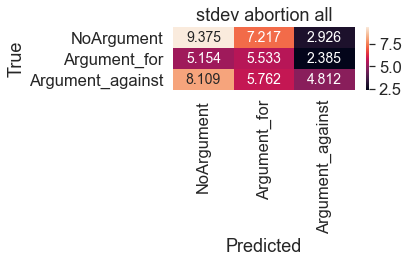

In [178]:
num_df_all_schooluni = seeds_df_confusion_matrix(schooluni_list, "all", 'abortion', stdev=True)

[array([[304,  30,  13],
        [ 22,  71,  14],
        [ 37,  40,  68]]),
 array([[328,  11,   8],
        [ 29,  64,  14],
        [ 58,  20,  67]]),
 array([[295,  32,  20],
        [ 16,  72,  19],
        [ 32,  32,  81]]),
 array([[309,  24,  14],
        [ 24,  70,  13],
        [ 36,  37,  72]]),
 array([[320,  16,  11],
        [ 25,  69,  13],
        [ 45,  27,  73]]),
 array([[322,  13,  12],
        [ 32,  59,  16],
        [ 51,  24,  70]]),
 array([[315,  19,  13],
        [ 28,  60,  19],
        [ 49,  28,  68]]),
 array([[312,  21,  14],
        [ 24,  66,  17],
        [ 36,  29,  80]]),
 array([[306,  30,  11],
        [ 19,  76,  12],
        [ 38,  35,  72]]),
 array([[320,  15,  12],
        [ 33,  60,  14],
        [ 50,  28,  67]])]

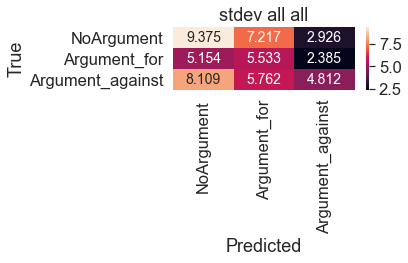

In [179]:
seeds_df_confusion_matrix(schooluni_list, "all", "all", stdev=True)